<h1>Syllabus<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seasonal-Factor" data-toc-modified-id="Seasonal-Factor-1">Seasonal Factor</a></span><ul class="toc-item"><li><span><a href="#Dept-Name-with-&quot;FRESH&quot;" data-toc-modified-id="Dept-Name-with-&quot;FRESH&quot;-1.1">Dept Name with "FRESH"</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1.1">EDA</a></span></li><li><span><a href="#Seasonal-Factor-Building" data-toc-modified-id="Seasonal-Factor-Building-1.1.2">Seasonal Factor Building</a></span><ul class="toc-item"><li><span><a href="#a)-Weekend-Factor" data-toc-modified-id="a)-Weekend-Factor-1.1.2.1">a) Weekend Factor</a></span></li><li><span><a href="#b)-Holiday-Factor" data-toc-modified-id="b)-Holiday-Factor-1.1.2.2">b) Holiday Factor</a></span></li><li><span><a href="#c)-Month-Factor" data-toc-modified-id="c)-Month-Factor-1.1.2.3">c) Month Factor</a></span></li></ul></li><li><span><a href="#MSE-as-feature-distance" data-toc-modified-id="MSE-as-feature-distance-1.1.3">MSE as feature distance</a></span></li><li><span><a href="#Recommendation-Results" data-toc-modified-id="Recommendation-Results-1.1.4">Recommendation Results</a></span></li></ul></li></ul></li></ul></div>

Junyue Wu

# Seasonal Factor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
df = pd.read_csv("DailySales_sorted.csv")

In [29]:
df.shape

(74824, 189)

## Dept Name with "FRESH"

In [30]:
# fresh food departments
fresh_foods = df[df['dept_name'].str.find('FRESH') != -1]

In [31]:
fresh_foods.head()

item_desc  dept      dept_name  class  class_name  \
66123            #SIAKAP - KG (9065)   266  FRESH SEAFOOD      1  FRESH FISH   
66124              GERUT (KG) (9011)   266  FRESH SEAFOOD      1  FRESH FISH   
66125  CLEANED KELI FISH (KG) (9009)   266  FRESH SEAFOOD      1  FRESH FISH   
66126       IKAN SEBELAH - KG (8623)   266  FRESH SEAFOOD      1  FRESH FISH   
66127       IKAN SEBELAH - KG (8624)   266  FRESH SEAFOOD      1  FRESH FISH   

       subclass                sub_name      Item  2020-01-01  2020-01-02  \
66123         1                    BASS   1495569     28795.0     23569.0   
66124         2  BREAM/SNAPPER(JENAHAK)   1770527         0.0        13.0   
66125         3                CAT FISH      7765      1872.0      1339.0   
66126         5         FLAT FISH/SHARK  73230944         0.0         0.0   
66127         5         FLAT FISH/SHARK  73231150        65.0        78.0   

       ...  2020-06-20  2020-06-21  2020-06-22  2020-06-23  2020-06-24  \
66123  ...         0.0         0.0         0.0         0.0         0.0   
66124  ...         0.0         0.0         0.0         0.0         0.0   
66125  ...      2600.0      2775.0      3098.0      2002.0      2028.0   
66126  ...         0.0         0.0         0.0         0.0         0.0   
66127  ...         0.0         0.0         0.0         0.0         0.0   

       2020-06-25  2020-06-26  2020-06-27  2020-06-28  2020-06-29  
66123         0.0         0.0         0.0         0.0         0.0  
66124         0.0         0.0         0.0         0.0         0.0  
66125      2171.0      2600.0      3198.0      2759.0      2416.0  
66126         0.0         0.0         0.0         0.0         0.0  
66127         0.0         0.0         0.0         0.0         0.0  

[5 rows x 189 columns]

In [ ]:
# fruit departments
fruits = df[df['dept_name'].str.find('FRUIT') != -1]
fruits.head()

### EDA

consistent with Yiheng's processing 

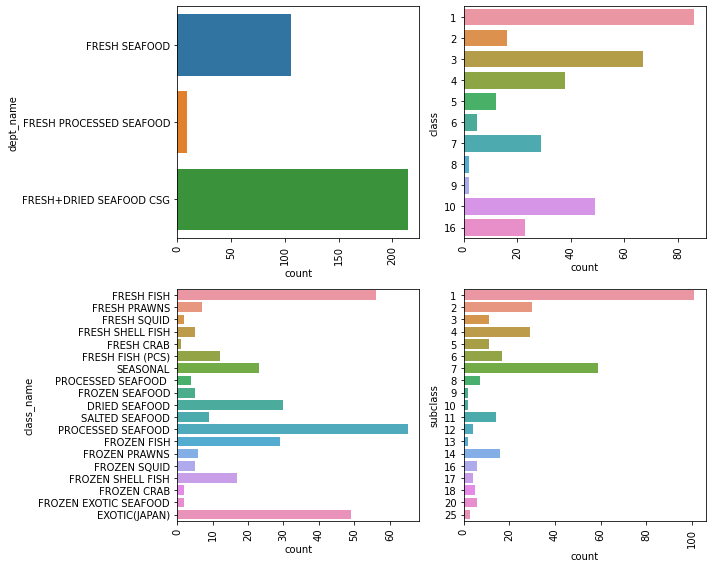

In [15]:
plt.figure(figsize=(10, 8))
cat_cols = ['dept_name', 'class','class_name','subclass']
i = 1

for col in cat_cols:
    plt.subplot(2, 2, i)
    sns.countplot(y=fresh_foods[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    i += 1

plt.tight_layout()

In [32]:
fresh_foods = fresh_foods.drop(['dept','dept_name','class','class_name','subclass','sub_name','Item'], axis=1)

In [33]:
# TO DO: Pivot the results from wide to long
fresh_foods = pd.pivot_table(fresh_foods,columns=['item_desc'])
fresh_foods.index = pd.to_datetime(fresh_foods.index)
fresh_foods.head(3)

item_desc   #CENCARU (KG) (9007)  #SIAKAP - KG (9065)  \
2020-01-01               12623.0              28795.0   
2020-01-02                7423.0              23569.0   
2020-01-03                8138.0              29380.0   

item_desc   #SOTONG PUTIH (KG) (9067)  #UDANG SEDERHANA (KG)(9085)  \
2020-01-01                     9646.0                     113048.0   
2020-01-02                     7930.0                      87230.0   
2020-01-03                     7579.0                      91910.0   

item_desc   333 GOLD LONG FISH CAKE 200G/PACK  \
2020-01-01                             2353.0   
2020-01-02                             1651.0   
2020-01-03                             2431.0   

item_desc   333 GOLD SMALL WHITE FISH BALL 135G/PACK  \
2020-01-01                                    2015.0   
2020-01-02                                    1313.0   
2020-01-03                                    1989.0   

item_desc   AAA BEBOLA IKAN GORENG BESAR 160G  \
2020-01-01                                0.0   
2020-01-02                                0.0   
2020-01-03                                0.0   

item_desc   AAA BEBOLA IKAN GORENG KECIL 160G  AAA BEBOLA IKAN SAYUR 160G  \
2020-01-01                                0.0                         0.0   
2020-01-02                                0.0                         0.0   
2020-01-03                                0.0                         0.0   

item_desc   AAA Bebola Ikan Putih Kecil 135g  ...  \
2020-01-01                               0.0  ...   
2020-01-02                               0.0  ...   
2020-01-03                               0.0  ...   

item_desc   WHOLE JENAHAK PUTIH PER KG (8316)  WHOLE KERAPU (KG) (8697)  \
2020-01-01                                0.0                       0.0   
2020-01-02                                0.0                      13.0   
2020-01-03                                0.0                      26.0   

item_desc   WHOLE KURAU PER KG (8111)  WHOLE MERAH (KG) (8168)  \
2020-01-01                        0.0                      0.0   
2020-01-02                        0.0                      0.0   
2020-01-03                        0.0                      0.0   

item_desc   WHOLE SHELL MUSSEL 400GM (9439)  WHOLE SOTONG RENDAM PCS (8738)  \
2020-01-01                            156.0                          6890.0   
2020-01-02                             91.0                          5421.0   
2020-01-03                             52.0                          6903.0   

item_desc   WHOLE TENGGIRI (KG) (8690)  WHOLE TONGSAN (KG) (8709)  \
2020-01-01                        13.0                        0.0   
2020-01-02                         0.0                        0.0   
2020-01-03                         0.0                        0.0   

item_desc   YELLOW FIN SOLE FILLET 250GM  Yong Tou Fu 5 pcs  
2020-01-01                           0.0                0.0  
2020-01-02                           0.0                0.0  
2020-01-03                           0.0                0.0  

[3 rows x 328 columns]

In [34]:
## TO DO: find foods with a zero sale over 25% of the full time window
food_remove = []
for food in fresh_foods.columns:
    zero_days = len(fresh_foods[fresh_foods[food]==0])
    all_days = len(fresh_foods)
    if zero_days>=all_days*1/4:
        food_remove.append(food)

In [35]:
len(food_remove)

184

In [36]:
fresh_foods = fresh_foods.drop(food_remove, axis=1)
fresh_foods.head()

item_desc   #CENCARU (KG) (9007)  #SOTONG PUTIH (KG) (9067)  \
2020-01-01               12623.0                     9646.0   
2020-01-02                7423.0                     7930.0   
2020-01-03                8138.0                     7579.0   
2020-01-04                7696.0                     8515.0   
2020-01-05               10519.0                     7229.0   

item_desc   #UDANG SEDERHANA (KG)(9085)  333 GOLD LONG FISH CAKE 200G/PACK  \
2020-01-01                     113048.0                             2353.0   
2020-01-02                      87230.0                             1651.0   
2020-01-03                      91910.0                             2431.0   
2020-01-04                     119587.0                             3861.0   
2020-01-05                     122239.0                             2268.0   

item_desc   333 GOLD SMALL WHITE FISH BALL 135G/PACK  BALITONG (KG) (9001)  \
2020-01-01                                    2015.0                  65.0   
2020-01-02                                    1313.0                  39.0   
2020-01-03                                    1989.0                 715.0   
2020-01-04                                    2613.0                 520.0   
2020-01-05                                    1953.0                1058.0   

item_desc   BAWAL EMAS PCS (8148)  BAWAL HITAM (KG) (9003)  \
2020-01-01                51441.0                   2951.0   
2020-01-02                41951.0                   2275.0   
2020-01-03                65910.0                   2847.0   
2020-01-04               108589.0                   3393.0   
2020-01-05               115027.0                   3956.0   

item_desc   BEBOLA IKAN PUTEH KECIL 170G/PKT?????  \
2020-01-01                                  364.0   
2020-01-02                                  442.0   
2020-01-03                                  546.0   
2020-01-04                                  520.0   
2020-01-05                                  806.0   

item_desc   BEBOLA IKAN PUTEH KECIL 450G/PKT  ...  UDANG GERAGAU?100G  \
2020-01-01                            1963.0  ...               598.0   
2020-01-02                            1157.0  ...               481.0   
2020-01-03                            1352.0  ...               585.0   
2020-01-04                            1690.0  ...               546.0   
2020-01-05                            1712.0  ...               637.0   

item_desc   UDANG HARIMAU L (KG) (9081)  UDANG KERING JUMBO (8379)  \
2020-01-01                         78.0                     1248.0   
2020-01-02                        117.0                      845.0   
2020-01-03                        130.0                      858.0   
2020-01-04                        156.0                     1404.0   
2020-01-05                        104.0                      949.0   

item_desc   UDANG KERING MERAH 150G  UDANG KERING MERAH 75G  \
2020-01-01                    182.0                   767.0   
2020-01-02                     39.0                   455.0   
2020-01-03                     91.0                   585.0   
2020-01-04                     91.0                   741.0   
2020-01-05                    185.0                   923.0   

item_desc   UG STEAMBOAT BALLS ASSORTED KG  UG YONG TOFU ASSORTED PCS  \
2020-01-01                           195.0                      182.0   
2020-01-02                           169.0                      130.0   
2020-01-03                            52.0                      208.0   
2020-01-04                           221.0                       26.0   
2020-01-05                           182.0                      104.0   

item_desc   US SCALLOP MEAT(20/30) 200G  WHOLE SHELL MUSSEL 400GM (9439)  \
2020-01-01                        403.0                            156.0   
2020-01-02                        156.0                             91.0   
2020-01-03                        403.0                             52.0   
2020-01-0

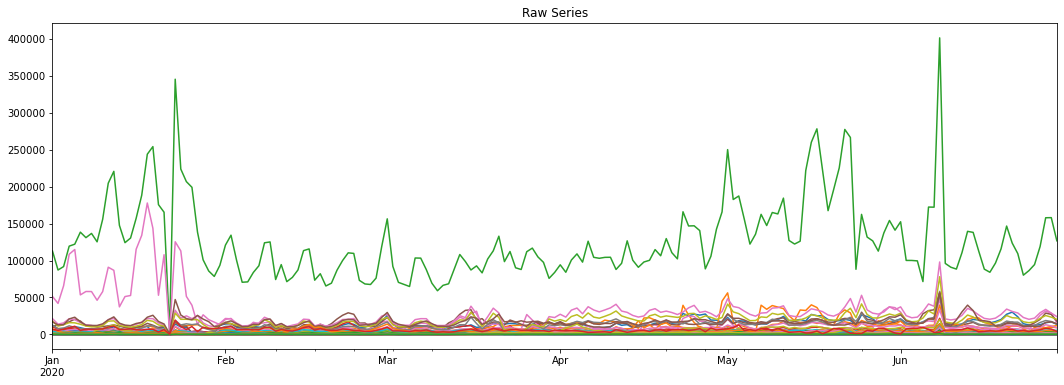

In [124]:
## TO DO: have a glimpse of the series
fresh_foods.plot(figsize=(18, 6), legend=None, title="Raw Series");

### Seasonal Factor Building

In [125]:
# Return Back to wide for convenience
fresh_foods_wide = pd.pivot_table(fresh_foods,columns=fresh_foods.index)
fresh_foods_wide.head()

2020-01-01  2020-01-02  2020-01-03  \
item_desc                                                                      
#CENCARU (KG) (9007)                         12623.0      7423.0      8138.0   
#SOTONG PUTIH (KG) (9067)                     9646.0      7930.0      7579.0   
#UDANG SEDERHANA (KG)(9085)                 113048.0     87230.0     91910.0   
333 GOLD LONG FISH CAKE 200G/PACK             2353.0      1651.0      2431.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      2015.0      1313.0      1989.0   

                                          2020-01-04  2020-01-05  2020-01-06  \
item_desc                                                                      
#CENCARU (KG) (9007)                          7696.0     10519.0      9035.0   
#SOTONG PUTIH (KG) (9067)                     8515.0      7229.0      5840.0   
#UDANG SEDERHANA (KG)(9085)                 119587.0    122239.0    138541.0   
333 GOLD LONG FISH CAKE 200G/PACK             3861.0      2268.0      1978.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      2613.0      1953.0      1498.0   

                                          2020-01-07  2020-01-08  2020-01-09  \
item_desc                                                                      
#CENCARU (KG) (9007)                          7293.0      7449.0      7150.0   
#SOTONG PUTIH (KG) (9067)                     5798.0      4355.0      5070.0   
#UDANG SEDERHANA (KG)(9085)                 131105.0    136825.0    125437.0   
333 GOLD LONG FISH CAKE 200G/PACK             1898.0      1677.0      1755.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      1300.0      1300.0      1248.0   

                                          2020-01-10  ...  2020-06-20  \
item_desc                                             ...               
#CENCARU (KG) (9007)                          7267.0  ...     27248.0   
#SOTONG PUTIH (KG) (9067)                     5967.0  ...     10673.0   
#UDANG SEDERHANA (KG)(9085)                 155938.0  ...    146796.0   
333 GOLD LONG FISH CAKE 200G/PACK             2678.0  ...      3861.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      2080.0  ...      3081.0   

                                          2020-06-21  2020-06-22  2020-06-23  \
item_desc                                                                      
#CENCARU (KG) (9007)                         30173.0     23838.0     14469.0   
#SOTONG PUTIH (KG) (9067)                    11146.0     11038.0      9165.0   
#UDANG SEDERHANA (KG)(9085)                 123718.0    109454.0     80249.0   
333 GOLD LONG FISH CAKE 200G/PACK             2977.0      2848.0      1703.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      2483.0      2608.0      1586.0   

                                          2020-06-24  2020-06-25  2020-06-26  \
item_desc                                                                      
#CENCARU (KG) (9007)                         12753.0     12493.0     13130.0   
#SOTONG PUTIH (KG) (9067)                     7774.0      7358.0      7332.0   
#UDANG SEDERHANA (KG)(9085)                  86411.0     94575.0    119145.0   
333 GOLD LONG FISH CAKE 200G/PACK             1274.0      1274.0      1404.0   
333 GOLD SMALL WHITE FISH BALL 135G/PACK      1157.0      1079.0       884.0   

                                          2020-06-27  2020-06-28  2020-06-29  
item_desc                                                                     
#CENCARU (KG) (9007)                         15769.0     16979.0     13616.0  
#SOTONG PUTIH (KG) (9067)                     8827.0      9751.0      9200.0  
#UDANG SEDERHANA (KG)(9085)                 158067.0    158213.0    126816.0  
333 GOLD LONG FISH CAKE 200G/PACK             1144.0       715.0       592.0  
333 GOLD SMALL WHITE FISH BALL 135G/PACK       780.0       455.0       480.0  

[5 rows x 181 columns]

In [39]:
fresh_foods_wide.columns

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
               '2020-06-28', '2020-06-29'],
              dtype='datetime64[ns]', length=181, freq=None)

#### a) Weekend Factor

The calendar begins from 2020-01-01 as the Wednesday in week1, ends in 2020-06-29 as the Monday in week27.

In [55]:
from datetime import datetime
# isocalendar returns (year, week number, day in that week)

In [51]:
i=0
print(fresh_foods_wide.columns[i])
print(fresh_foods_wide.columns[i].isocalendar())

2020-01-01 00:00:00
(2020, 1, 3)


In [54]:
i=-1
print(fresh_foods_wide.columns[i])
print(fresh_foods_wide.columns[i].isocalendar())

2020-06-29 00:00:00
(2020, 27, 1)


Create a weekend factor for week no.w, which is computed as follows:<br/>
<br/>
$weekend_w\_factor = \frac{AVG(weekend_w\_sales)}{AVG(week_w\_sales)}$<br/>
<br/>
we teased out $week_{27}$ because it only has one day in that week.

In [186]:
# Build up Weekend Factor for every week

def weekend_factor(wide_data,week_no_begin,week_no_end):
    
    weekend_factor_metrics = pd.DataFrame(index = wide_data.index)
    
    for w in range(week_no_begin,week_no_end+1): # for loop to enumerate every week needed
        
        date_in_w  = [date for date in fresh_foods_wide.columns if date.isocalendar()[1] == w] # all dates in week w
        weekday_date = [date for date in date_in_w if date.isocalendar()[2] <= 5]              # all weekday dates in week w
        weekend_date = [date for date in date_in_w if date.isocalendar()[2] > 5]               # all weekend dates in week w
        
        week_avgsales = wide_data[date_in_w].mean(axis = 1)
        weekday_avgsales = wide_data[weekday_date].mean(axis = 1)
        weekend_avgsales = wide_data[weekend_date].mean(axis = 1)
        
       
        weekend_factor_metrics["weekend{}_factor".format(w)] = weekend_avgsales/week_avgsales
    
    return weekend_factor_metrics

In [187]:
weekend_factor_metrics = weekend_factor(fresh_foods_wide,week_no_begin = 1,week_no_end = 26) # we only use weeks that are completed
print(weekend_factor_metrics.shape)
weekend_factor_metrics.head()

(144, 26)


weekend1_factor  weekend2_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             0.981433         1.127491   
#SOTONG PUTIH (KG) (9067)                        0.962371         1.149448   
#UDANG SEDERHANA (KG)(9085)                      1.132115         1.338341   
333 GOLD LONG FISH CAKE 200G/PACK                1.219556         1.289730   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.155014         1.347180   

                                          weekend3_factor  weekend4_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             0.890465         0.769823   
#SOTONG PUTIH (KG) (9067)                        1.345021         1.286612   
#UDANG SEDERHANA (KG)(9085)                      1.399411         1.077233   
333 GOLD LONG FISH CAKE 200G/PACK                1.311117         1.241286   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.345724         1.226777   

                                          weekend5_factor  weekend6_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             2.396558         0.993258   
#SOTONG PUTIH (KG) (9067)                        0.883134         1.410124   
#UDANG SEDERHANA (KG)(9085)                      1.187229         1.305852   
333 GOLD LONG FISH CAKE 200G/PACK                1.219677         1.438281   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.211646         1.487643   

                                          weekend7_factor  weekend8_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             1.656128         1.299093   
#SOTONG PUTIH (KG) (9067)                        1.123975         1.179821   
#UDANG SEDERHANA (KG)(9085)                      1.265557         1.253030   
333 GOLD LONG FISH CAKE 200G/PACK                1.384794         1.297484   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.298469         1.297391   

                                          weekend9_factor  weekend10_factor  \
item_desc                                                                     
#CENCARU (KG) (9007)                             1.471798          0.954997   
#SOTONG PUTIH (KG) (9067)                        1.166770          1.301672   
#UDANG SEDERHANA (KG)(9085)                      1.437042          1.133873   
333 GOLD LONG FISH CAKE 200G/PACK                1.381339          1.285470   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.384902          1.369763   

                                          ...  weekend17_factor  \
item_desc                                 ...                     
#CENCARU (KG) (9007)                      ...          1.192376   
#SOTONG PUTIH (KG) (9067)                 ...          0.785417   
#UDANG SEDERHANA (KG)(9085)               ...          1.067262   
333 GOLD LONG FISH CAKE 200G/PACK         ...          0.984435   
333 GOLD SMALL WHITE FISH BALL 135G/PACK  ...          1.103644   

                                          weekend18_factor  weekend19_factor  \
item_desc                                                                      
#CENCARU (KG) (9007)                              0.844084          1.209288   
#SOTONG PUTIH (KG) (9067)                         0.610966          1.653256   
#UDANG SEDERHANA (KG)(9085)                       1.153258          1.092229   
333 GOLD LONG FISH CAKE 200G/PACK                 0.919626          1.287892   
333 GOLD SMALL WHITE FISH BALL 135G/PACK          1.085818          1.322992   

                                          weekend20_factor  weekend21_factor  \
item_desc                                                                      
#CENCARU (KG) (9007)                              1.200040          0.821850   
#SOTONG PUTIH (KG) (9067)    

In [205]:
weekend_factor_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, #CENCARU (KG) (9007) to WHOLE SOTONG RENDAM PCS (8738)
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weekend1_factor   143 non-null    float64
 1   weekend2_factor   144 non-null    float64
 2   weekend3_factor   144 non-null    float64
 3   weekend4_factor   144 non-null    float64
 4   weekend5_factor   144 non-null    float64
 5   weekend6_factor   144 non-null    float64
 6   weekend7_factor   144 non-null    float64
 7   weekend8_factor   144 non-null    float64
 8   weekend9_factor   144 non-null    float64
 9   weekend10_factor  144 non-null    float64
 10  weekend11_factor  144 non-null    float64
 11  weekend12_factor  144 non-null    float64
 12  weekend13_factor  144 non-null    float64
 13  weekend14_factor  144 non-null    float64
 14  weekend15_factor  144 non-null    float64
 15  weekend16_factor  144 non-null    float64
 16  wee

This would create NA if the item have no sales in that week.($weekend_w\_factor = \frac{0}{0}=NA$) <br/>
Since NAs only takes up a really small fraction, we could fill those NAs with value 1.
(Regard them the same case as equivalent daily sales in that week, then $weekend_w\_factor = \frac{s}{s} = 1$)

In [192]:
weekend_factor_metrics_nna = weekend_factor_metrics.fillna(1).copy()
weekend_factor_metrics_nna.isnull().any()

weekend1_factor     False
weekend2_factor     False
weekend3_factor     False
weekend4_factor     False
weekend5_factor     False
weekend6_factor     False
weekend7_factor     False
weekend8_factor     False
weekend9_factor     False
weekend10_factor    False
weekend11_factor    False
weekend12_factor    False
weekend13_factor    False
weekend14_factor    False
weekend15_factor    False
weekend16_factor    False
weekend17_factor    False
weekend18_factor    False
weekend19_factor    False
weekend20_factor    False
weekend21_factor    False
weekend22_factor    False
weekend23_factor    False
weekend24_factor    False
weekend25_factor    False
weekend26_factor    False
dtype: bool

#### b) Holiday Factor

[Malaysia Holiday Reference](https://www.officeholidays.com/countries/malaysia/2020)<br/>
We only includes national holidays' effect in our analysis that might be more significant.

Create a holiday factor for holiday h, which is computed as follows:<br/>
<br/>
$Holiday_h\_factor = \frac{AVG(Holiday_h\_sales)}{AVG(whole\_sales)}$<br/>
<br/>
where the number of days to be averaged in $AVG(Holiday_h\_sales)$ will be customized.

In [202]:
def holiday_factor(wide_data):
    
    holiday_factor_metrics = pd.DataFrame(index = wide_data.index)
    
    full_avgsales = wide_data.mean(axis = 1)
    
    # New Year Holiday
    new_year_date = pd.date_range(end="2020-01-01",periods = 1).to_pydatetime().tolist()
    # only 1 day in 2020 calendar
    new_year_avgsales = wide_data[new_year_date].mean(axis = 1)
    holiday_factor_metrics["new_year_factor"] = new_year_avgsales / full_avgsales
    
    # Chinese New year
    Chs_new_year_date = pd.date_range(end="2020-01-27",periods = 6).to_pydatetime().tolist() 
    # includes 3 more days before it starts
    Chs_new_year_avgsales = wide_data[Chs_new_year_date].mean(axis = 1)
    holiday_factor_metrics["Chs_new_year_factor"] = Chs_new_year_avgsales / full_avgsales
    
    ''' Federal Territory Day
    FTD_date = pd.date_range(end="2020-02-01",periods = 1).to_pydatetime().tolist()
    FTD_avgsales = wide_data[FTD_date].mean(axis = 1)
    holiday_factor_metrics["FTD_factor"] = FTD_avgsales / full_avgsales
    
    # Anniversary of Installation of the Sultan
    AIS_date = pd.date_range(end="2020-03-04",periods = 1).to_pydatetime().tolist()
    AIS_avgsales = wide_data[AIS_date].mean(axis = 1)
    holiday_factor_metrics["AIS_factor"] = AIS_avgsales / full_avgsales
    '''
    
    # Labor Day
    Labor_Day_date = pd.date_range(end="2020-05-01",periods = 1).to_pydatetime().tolist()
    Labor_Day_avgsales = wide_data[Labor_Day_date].mean(axis = 1)
    holiday_factor_metrics["Labor_Day_factor"] = Labor_Day_avgsales / full_avgsales
    
    # Wesak Day
    Wesak_Day_date = pd.date_range(end="2020-05-07",periods = 1).to_pydatetime().tolist()
    Wesak_Day_avgsales = wide_data[Wesak_Day_date].mean(axis = 1)
    holiday_factor_metrics["Wesak_Day_factor"] = Wesak_Day_avgsales / full_avgsales
    
    # Mother's Day
    Mom_Day_date = pd.date_range(end="2020-05-10",periods = 1).to_pydatetime().tolist()
    Mom_Day_avgsales = wide_data[Mom_Day_date].mean(axis = 1)
    holiday_factor_metrics["Mom_Day_factor"] = Mom_Day_avgsales / full_avgsales
    
    # Hari Raya Aidilfitri
    HRA_date = pd.date_range(end="2020-05-26",periods = 3).to_pydatetime().tolist()
    HRA_avgsales = wide_data[HRA_date].mean(axis = 1)
    holiday_factor_metrics["HRA_factor"] = HRA_avgsales / full_avgsales
    
    # Birthday of SPB Yang di Pertuan Agong
    BSPB_date = pd.date_range(end="2020-06-08",periods = 1).to_pydatetime().tolist()
    BSPB_avgsales = wide_data[BSPB_date].mean(axis = 1)
    holiday_factor_metrics["BSPB_factor"] = BSPB_avgsales / full_avgsales
    
    # Father's Day
    Dad_Day_date = pd.date_range(end="2020-06-21",periods = 1).to_pydatetime().tolist()
    Dad_Day_avgsales = wide_data[Dad_Day_date].mean(axis = 1)
    holiday_factor_metrics["Dad_Day_factor"] = Dad_Day_avgsales / full_avgsales
    
    return holiday_factor_metrics

In [204]:
holiday_factor_metrics = holiday_factor(fresh_foods_wide)
holiday_factor_metrics.head()

new_year_factor  \
item_desc                                                   
#CENCARU (KG) (9007)                             0.907714   
#SOTONG PUTIH (KG) (9067)                        0.766982   
#UDANG SEDERHANA (KG)(9085)                      0.900860   
333 GOLD LONG FISH CAKE 200G/PACK                0.792458   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         0.795055   

                                          Chs_new_year_factor  \
item_desc                                                       
#CENCARU (KG) (9007)                                 0.449459   
#SOTONG PUTIH (KG) (9067)                            0.860489   
#UDANG SEDERHANA (KG)(9085)                          1.483932   
333 GOLD LONG FISH CAKE 200G/PACK                    1.128851   
333 GOLD SMALL WHITE FISH BALL 135G/PACK             1.117286   

                                          Labor_Day_factor  Wesak_Day_factor  \
item_desc                                                                      
#CENCARU (KG) (9007)                              1.652697          1.024567   
#SOTONG PUTIH (KG) (9067)                         4.474273          3.144419   
#UDANG SEDERHANA (KG)(9085)                       1.995563          1.296385   
333 GOLD LONG FISH CAKE 200G/PACK                 1.711884          0.880022   
333 GOLD SMALL WHITE FISH BALL 135G/PACK          1.356526          0.979714   

                                          Mom_Day_factor  HRA_factor  \
item_desc                                                              
#CENCARU (KG) (9007)                            1.439485    1.521822   
#SOTONG PUTIH (KG) (9067)                       2.935697    0.993938   
#UDANG SEDERHANA (KG)(9085)                     1.300896    1.016642   
333 GOLD LONG FISH CAKE 200G/PACK               0.947379    1.151360   
333 GOLD SMALL WHITE FISH BALL 135G/PACK        1.181338    1.273141   

                                          BSPB_factor  Dad_Day_factor  
item_desc                                                              
#CENCARU (KG) (9007)                         4.189738        2.169727  
#SOTONG PUTIH (KG) (9067)                    4.570245        0.886251  
#UDANG SEDERHANA (KG)(9085)                  3.202458        0.985888  
333 GOLD LONG FISH CAKE 200G/PACK            3.125376        1.002612  
333 GOLD SMALL WHITE FISH BALL 135G/PACK     2.714631        0.979714

In [206]:
holiday_factor_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, #CENCARU (KG) (9007) to WHOLE SOTONG RENDAM PCS (8738)
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   new_year_factor      144 non-null    float64
 1   Chs_new_year_factor  144 non-null    float64
 2   Labor_Day_factor     144 non-null    float64
 3   Wesak_Day_factor     144 non-null    float64
 4   Mom_Day_factor       144 non-null    float64
 5   HRA_factor           144 non-null    float64
 6   BSPB_factor          144 non-null    float64
 7   Dad_Day_factor       144 non-null    float64
dtypes: float64(8)
memory usage: 14.2+ KB


#### c) Month Factor

Create a month factor for month $m = 1,2,...,6$, which is computed as follows:<br/>
<br/>
$Month_m\_factor = \frac{AVG(Month_m\_sales)}{AVG(whole\_sales)}$<br/>
<br/>

In [213]:
# Build up Month Factor for every Month

def Month_factor(wide_data,Month_begin,Month_end):
    
    Month_factor_metrics = pd.DataFrame(index = wide_data.index)
    
    full_avgsales = wide_data.mean(axis = 1)
    
    for m in range(Month_begin,Month_end+1): # for loop to enumerate month in data
        
        date_in_m  = [date for date in fresh_foods_wide.columns if date.month == m] # all dates in month m
        month_avgsales = wide_data[date_in_m].mean(axis = 1)
        Month_factor_metrics["Month{}_factor".format(m)] = month_avgsales/full_avgsales
    
    return Month_factor_metrics

In [214]:
Month_factor_metrics = Month_factor(fresh_foods_wide,Month_begin = 1,Month_end = 6)
Month_factor_metrics.head()

Month1_factor  Month2_factor  \
item_desc                                                                
#CENCARU (KG) (9007)                           0.524026       0.728726   
#SOTONG PUTIH (KG) (9067)                      0.626403       0.534072   
#UDANG SEDERHANA (KG)(9085)                    1.211453       0.731013   
333 GOLD LONG FISH CAKE 200G/PACK              0.834339       0.808682   
333 GOLD SMALL WHITE FISH BALL 135G/PACK       0.778140       0.785368   

                                          Month3_factor  Month4_factor  \
item_desc                                                                
#CENCARU (KG) (9007)                           0.902966       1.131641   
#SOTONG PUTIH (KG) (9067)                      0.737634       1.265128   
#UDANG SEDERHANA (KG)(9085)                    0.744903       0.902711   
333 GOLD LONG FISH CAKE 200G/PACK              1.217265       1.254192   
333 GOLD SMALL WHITE FISH BALL 135G/PACK       1.237876       1.274035   

                                          Month5_factor  Month6_factor  
item_desc                                                               
#CENCARU (KG) (9007)                           1.377425       1.344166  
#SOTONG PUTIH (KG) (9067)                      1.844108       0.969159  
#UDANG SEDERHANA (KG)(9085)                    1.390030       0.999355  
333 GOLD LONG FISH CAKE 200G/PACK              1.026383       0.844996  
333 GOLD SMALL WHITE FISH BALL 135G/PACK       1.072195       0.836853

In [215]:
Month_factor_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, #CENCARU (KG) (9007) to WHOLE SOTONG RENDAM PCS (8738)
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month1_factor  144 non-null    float64
 1   Month2_factor  144 non-null    float64
 2   Month3_factor  144 non-null    float64
 3   Month4_factor  144 non-null    float64
 4   Month5_factor  144 non-null    float64
 5   Month6_factor  144 non-null    float64
dtypes: float64(6)
memory usage: 11.9+ KB


### MSE as feature distance

In [226]:
fresh_foods_feature_metrics = pd.concat([weekend_factor_metrics_nna,Month_factor_metrics,holiday_factor_metrics], axis=1)
fresh_foods_feature_metrics.head()

weekend1_factor  weekend2_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             0.981433         1.127491   
#SOTONG PUTIH (KG) (9067)                        0.962371         1.149448   
#UDANG SEDERHANA (KG)(9085)                      1.132115         1.338341   
333 GOLD LONG FISH CAKE 200G/PACK                1.219556         1.289730   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.155014         1.347180   

                                          weekend3_factor  weekend4_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             0.890465         0.769823   
#SOTONG PUTIH (KG) (9067)                        1.345021         1.286612   
#UDANG SEDERHANA (KG)(9085)                      1.399411         1.077233   
333 GOLD LONG FISH CAKE 200G/PACK                1.311117         1.241286   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.345724         1.226777   

                                          weekend5_factor  weekend6_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             2.396558         0.993258   
#SOTONG PUTIH (KG) (9067)                        0.883134         1.410124   
#UDANG SEDERHANA (KG)(9085)                      1.187229         1.305852   
333 GOLD LONG FISH CAKE 200G/PACK                1.219677         1.438281   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.211646         1.487643   

                                          weekend7_factor  weekend8_factor  \
item_desc                                                                    
#CENCARU (KG) (9007)                             1.656128         1.299093   
#SOTONG PUTIH (KG) (9067)                        1.123975         1.179821   
#UDANG SEDERHANA (KG)(9085)                      1.265557         1.253030   
333 GOLD LONG FISH CAKE 200G/PACK                1.384794         1.297484   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.298469         1.297391   

                                          weekend9_factor  weekend10_factor  \
item_desc                                                                     
#CENCARU (KG) (9007)                             1.471798          0.954997   
#SOTONG PUTIH (KG) (9067)                        1.166770          1.301672   
#UDANG SEDERHANA (KG)(9085)                      1.437042          1.133873   
333 GOLD LONG FISH CAKE 200G/PACK                1.381339          1.285470   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         1.384902          1.369763   

                                          ...  Month5_factor  Month6_factor  \
item_desc                                 ...                                 
#CENCARU (KG) (9007)                      ...       1.377425       1.344166   
#SOTONG PUTIH (KG) (9067)                 ...       1.844108       0.969159   
#UDANG SEDERHANA (KG)(9085)               ...       1.390030       0.999355   
333 GOLD LONG FISH CAKE 200G/PACK         ...       1.026383       0.844996   
333 GOLD SMALL WHITE FISH BALL 135G/PACK  ...       1.072195       0.836853   

                                          new_year_factor  \
item_desc                                                   
#CENCARU (KG) (9007)                             0.907714   
#SOTONG PUTIH (KG) (9067)                        0.766982   
#UDANG SEDERHANA (KG)(9085)                      0.900860   
333 GOLD LONG FISH CAKE 200G/PACK                0.792458   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         0.795055   

                                          Chs_new_year_factor  \
item_desc                                                       
#CENCARU (KG) (9007)                                 0.449459   
#SOTONG PUTIH (KG) (9067)                            0.860489   
#UDANG SEDERHANA (KG)(9085)                          1.483

In [227]:
# Calculating pairwise products' MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

food_A = []
food_B = []
MSE_AB = []
MAE_AB = []

for food_a in fresh_foods_feature_metrics.index:
    for food_b in fresh_foods_feature_metrics.index:
        MSE_ab = mean_squared_error(fresh_foods_feature_metrics.loc[food_a],fresh_foods_feature_metrics.loc[food_b])
        MAE_ab = mean_absolute_error(fresh_foods_feature_metrics.loc[food_a],fresh_foods_feature_metrics.loc[food_b])
        food_A.append(food_a)
        food_B.append(food_b)
        MSE_AB.append(MSE_ab)
        MAE_AB.append(MAE_ab)

In [228]:
results = pd.DataFrame({'food_A':food_A, 'food_B':food_B, 'MSE_AB':MSE_AB, 'MAE_AB':MAE_AB})
results = results[results.food_A != results.food_B]
results.head(3)

food_A                             food_B    MSE_AB    MAE_AB
1  #CENCARU (KG) (9007)          #SOTONG PUTIH (KG) (9067)  0.543554  0.451095
2  #CENCARU (KG) (9007)        #UDANG SEDERHANA (KG)(9085)  0.183887  0.296496
3  #CENCARU (KG) (9007)  333 GOLD LONG FISH CAKE 200G/PACK  0.182295  0.317487

### Recommendation Results

In [232]:
# find minimum MSE for every pair of items
a = pd.DataFrame(results.groupby(['food_A'])['MSE_AB'].min())
b = pd.merge(a,results,on='MSE_AB',how='left')
b = b.groupby(['food_A'])['food_B','MSE_AB'].min()
b.head(10)

food_B  \
food_A                                                                               
#CENCARU (KG) (9007)                                            MABONG (KG) (8647)   
#SOTONG PUTIH (KG) (9067)                                IKAN TERUBOK - PCSS(8346)   
#UDANG SEDERHANA (KG)(9085)                               SALMON BLOCK (KG) (8483)   
333 GOLD LONG FISH CAKE 200G/PACK         333 GOLD SMALL WHITE FISH BALL 135G/PACK   
333 GOLD SMALL WHITE FISH BALL 135G/PACK         333 GOLD LONG FISH CAKE 200G/PACK   
BALITONG (KG) (9001)                                      KERAPU BLOCK (KG) (8698)   
BAWAL EMAS PCS (8148)                            FRZ KAMI JAPANESE SHARK FIN 500GM   
BAWAL HITAM (KG) (9003)                                    IKAN BIIS BELAH ( 9154)   
BEBOLA IKAN PUTEH KECIL 170G/PKT?????                    KEK IKAN PANJANG 450G/PKT   
BEBOLA IKAN PUTEH KECIL 450G/PKT                         KEK IKAN PANJANG 450G/PKT   

                                            MSE_AB  
food_A                                              
#CENCARU (KG) (9007)                      0.034630  
#SOTONG PUTIH (KG) (9067)                 0.196441  
#UDANG SEDERHANA (KG)(9085)               0.028938  
333 GOLD LONG FISH CAKE 200G/PACK         0.016368  
333 GOLD SMALL WHITE FISH BALL 135G/PACK  0.016368  
BALITONG (KG) (9001)                      0.686432  
BAWAL EMAS PCS (8148)                     0.077062  
BAWAL HITAM (KG) (9003)                   0.040653  
BEBOLA IKAN PUTEH KECIL 170G/PKT?????     0.024222  
BEBOLA IKAN PUTEH KECIL 450G/PKT          0.026546

In [233]:
# Normalize time-series data with z-scores
df_normalized = pd.DataFrame()
for food in fresh_foods.columns:
    df_normalized[food] = (fresh_foods[food]- fresh_foods[food].mean())/fresh_foods[food].std() # z-score
df_normalized.index = fresh_foods.index

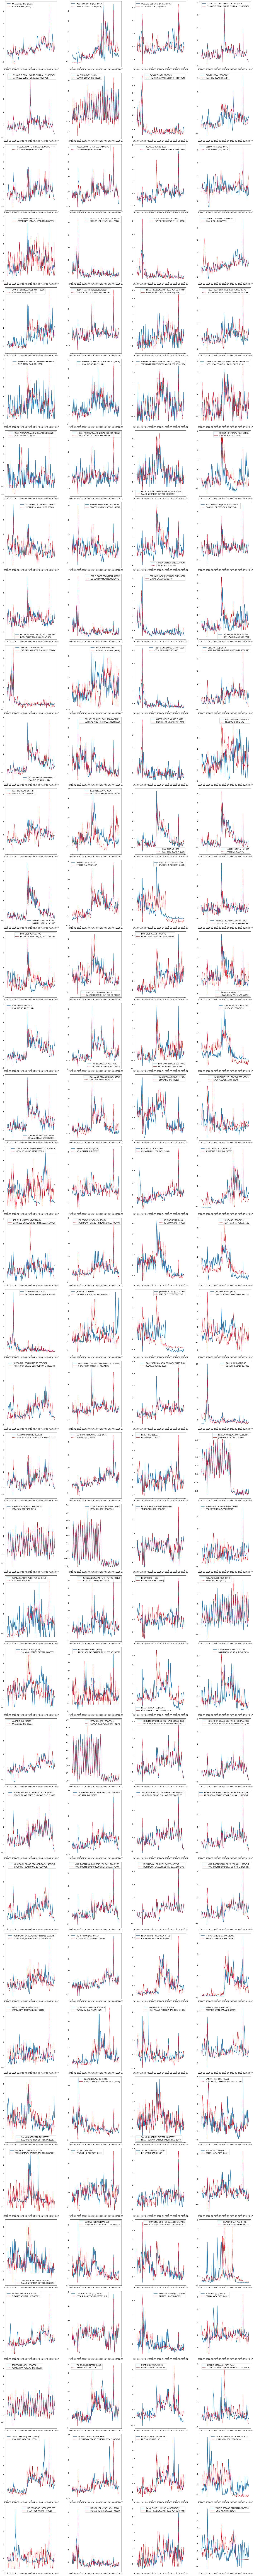

In [245]:
# Visualize recommendation results
plt.figure(figsize=(20, 200))
i = 1
for food_A in b.index:
    plt.subplot(36, 4, i)
    food_B = b.loc[food_A]['food_B']
    df_viz = df_normalized[[food_A,food_B]]
    sns.lineplot(data=df_viz[[food_A]])
    sns.lineplot(data=df_viz[[food_B]],palette=['red'], dashes=[(2,2)])
    i += 1
plt.tight_layout()